# Twitter Sentiment Analysis

#### Import Necessary Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\omdes\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Load The Data

In [3]:
training_data = pd.read_csv(r'C:\Users\omdes\Desktop\tcs\Dataset-main\twitter_training.csv')
validation_data = pd.read_csv(r'C:\Users\omdes\Desktop\tcs\Dataset-main\twitter_validation.csv')

In [4]:
training_data.shape

(74681, 4)

In [5]:
validation_data.shape

(999, 4)

In [6]:
training_data.dtypes

2401                                                      int64
Borderlands                                              object
Positive                                                 object
im getting on borderlands and i will murder you all ,    object
dtype: object

In [7]:
training_data.describe()

,2401
count,74681.000000
mean,6432.640149
std,3740.423819
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [8]:
training_data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [9]:
validation_data.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


#### Data Preprocessing

In [10]:
training_data.columns = ['ID', 'Entity', 'Sentiment', 'Message']
validation_data.columns = ['ID', 'Entity', 'Sentiment', 'Message']

In [11]:
training_data['Message'] = training_data['Message'].astype(str).fillna('')
validation_data['Message'] = validation_data['Message'].astype(str).fillna('')

In [12]:
stemmer = PorterStemmer()

In [13]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Apply stemming to each token
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    # Join back the stemmed tokens into a single string for TF-IDF processing
    return ' '.join(stemmed_tokens)


In [14]:
training_data['Processed_Message'] = training_data['Message'].apply(preprocess_text)
validation_data['Processed_Message'] = validation_data['Message'].apply(preprocess_text)

#### Exploratory Data Analysis

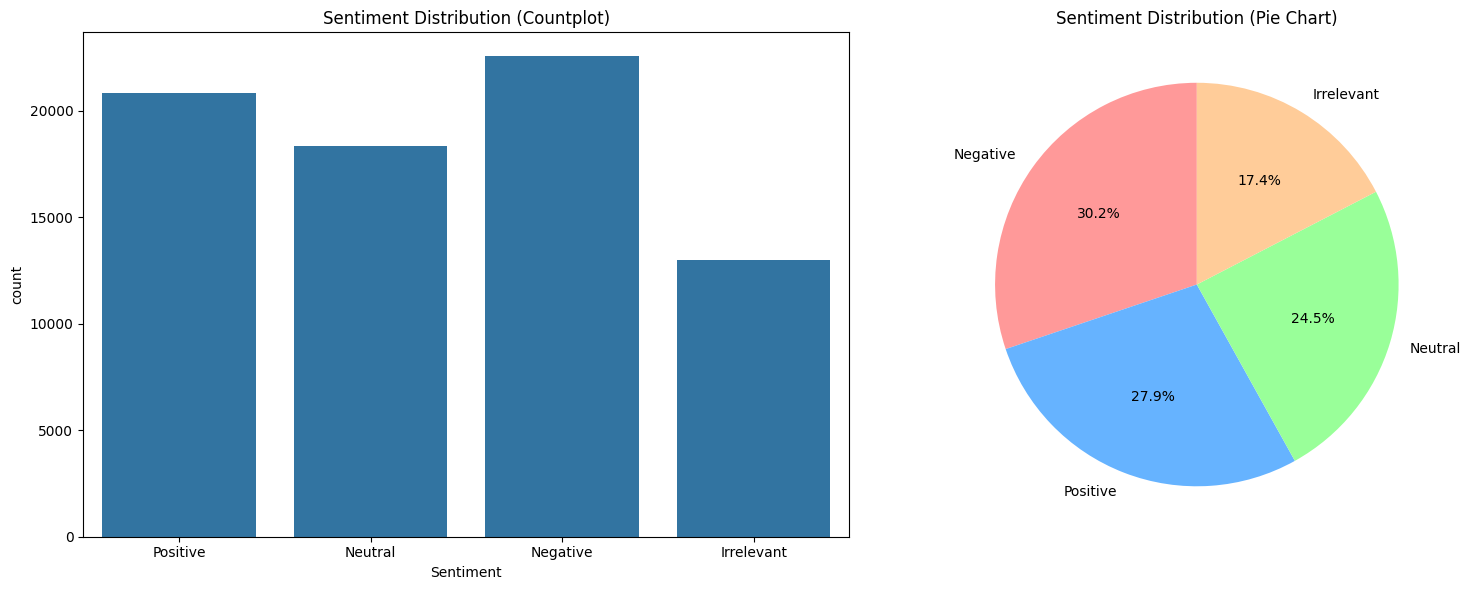

In [43]:
# EDA 1: Sentiment Distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))


sns.countplot(x='Sentiment', data=training_data, ax=axes[0])
axes[0].set_title('Sentiment Distribution (Countplot)')


sentiment_counts = training_data['Sentiment'].value_counts()


axes[1].pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', 
            startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
axes[1].set_title('Sentiment Distribution (Pie Chart)')


plt.tight_layout()
plt.show()

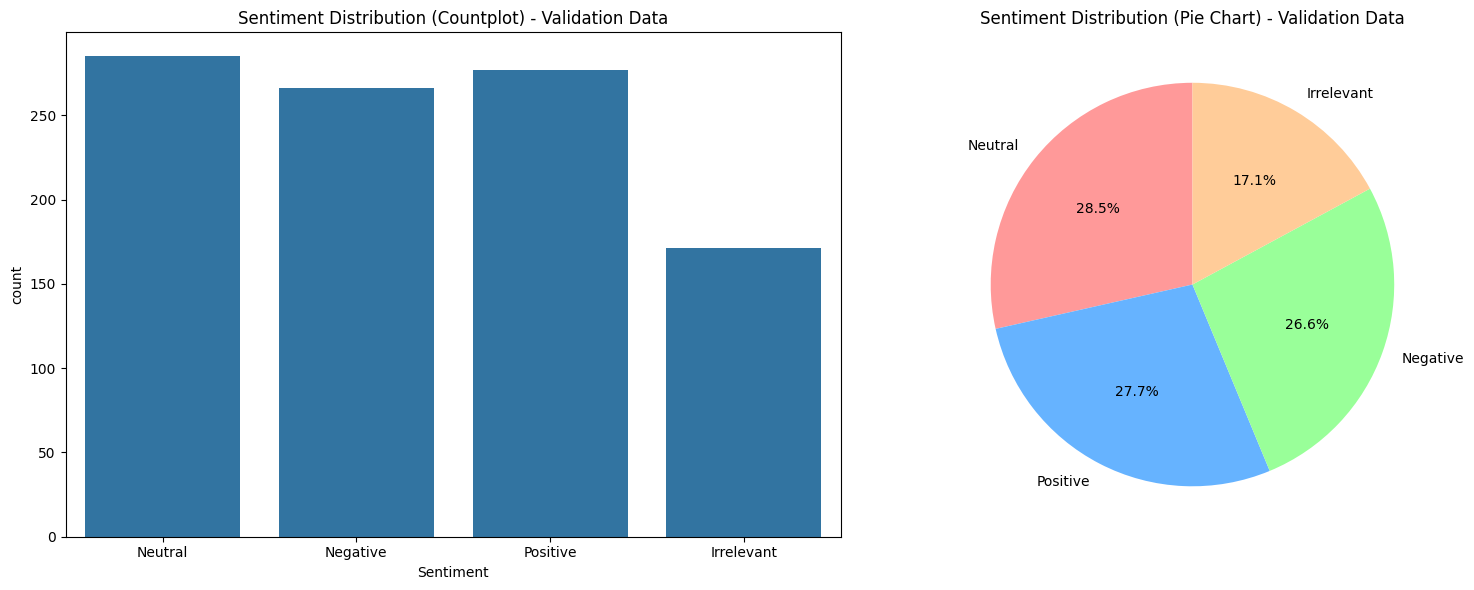

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(x='Sentiment', data=validation_data, ax=axes[0])
axes[0].set_title('Sentiment Distribution (Countplot) - Validation Data')

sentiment_counts = validation_data['Sentiment'].value_counts()

axes[1].pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', 
            startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
axes[1].set_title('Sentiment Distribution (Pie Chart) - Validation Data')

plt.tight_layout()
plt.show()

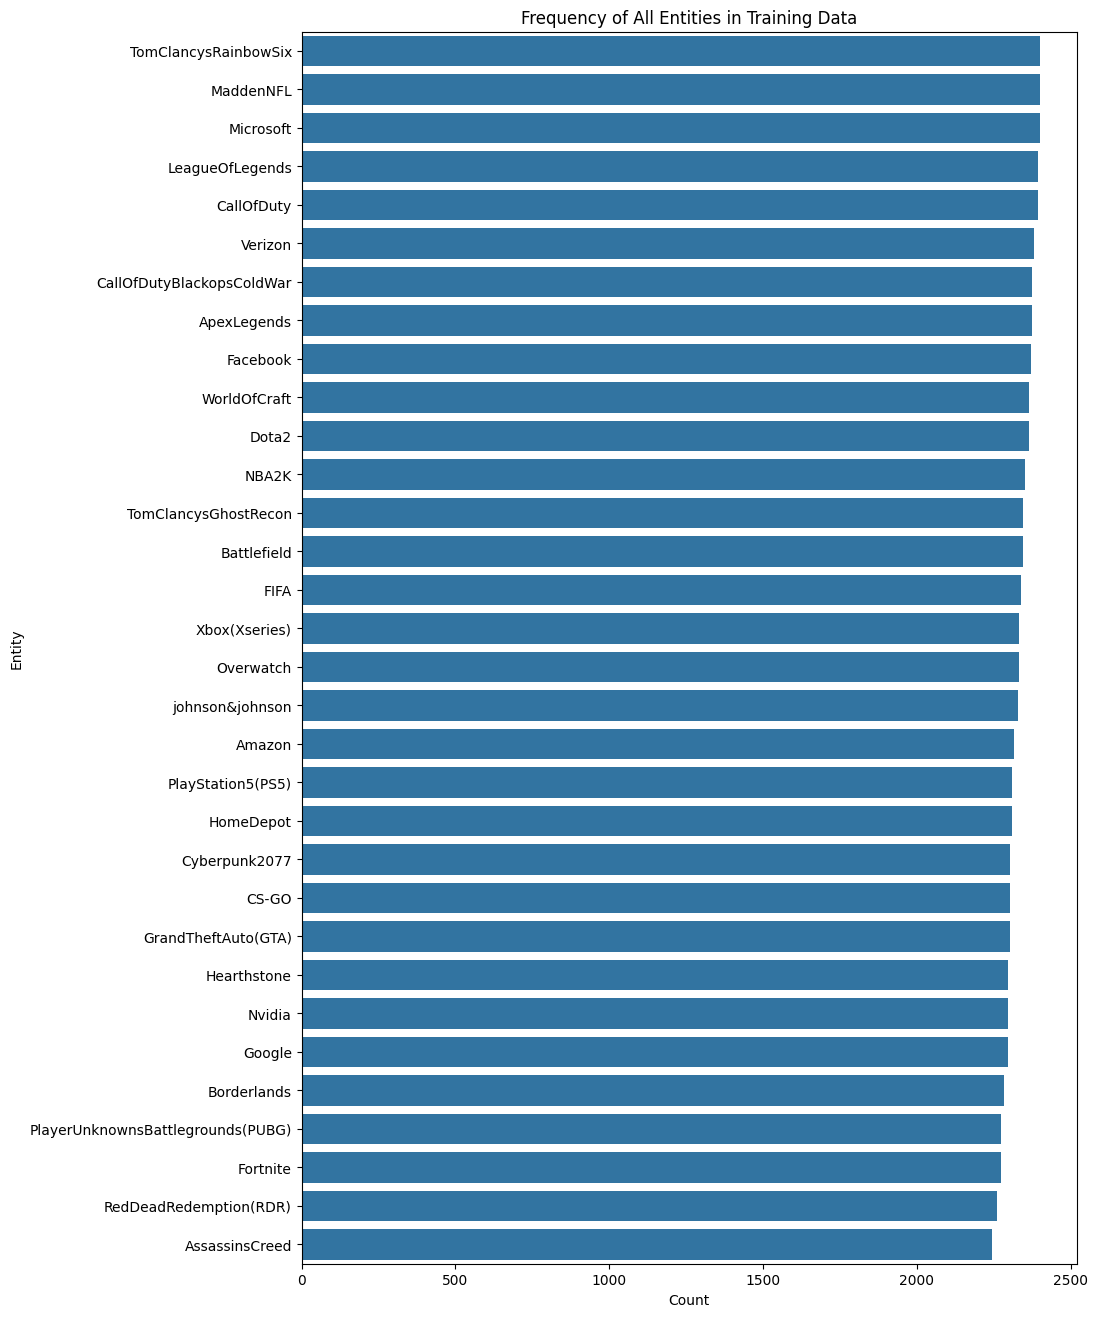

In [19]:
# EDA 2: Frequency of All Entities in Training Data
entity_counts = training_data['Entity'].value_counts()

plt.figure(figsize=(10, len(entity_counts) / 2))
sns.barplot(y=entity_counts.index, x=entity_counts.values, orient='h')
plt.title('Frequency of All Entities in Training Data')
plt.xlabel('Count')
plt.ylabel('Entity')
plt.show()

<Figure size 1200x800 with 0 Axes>

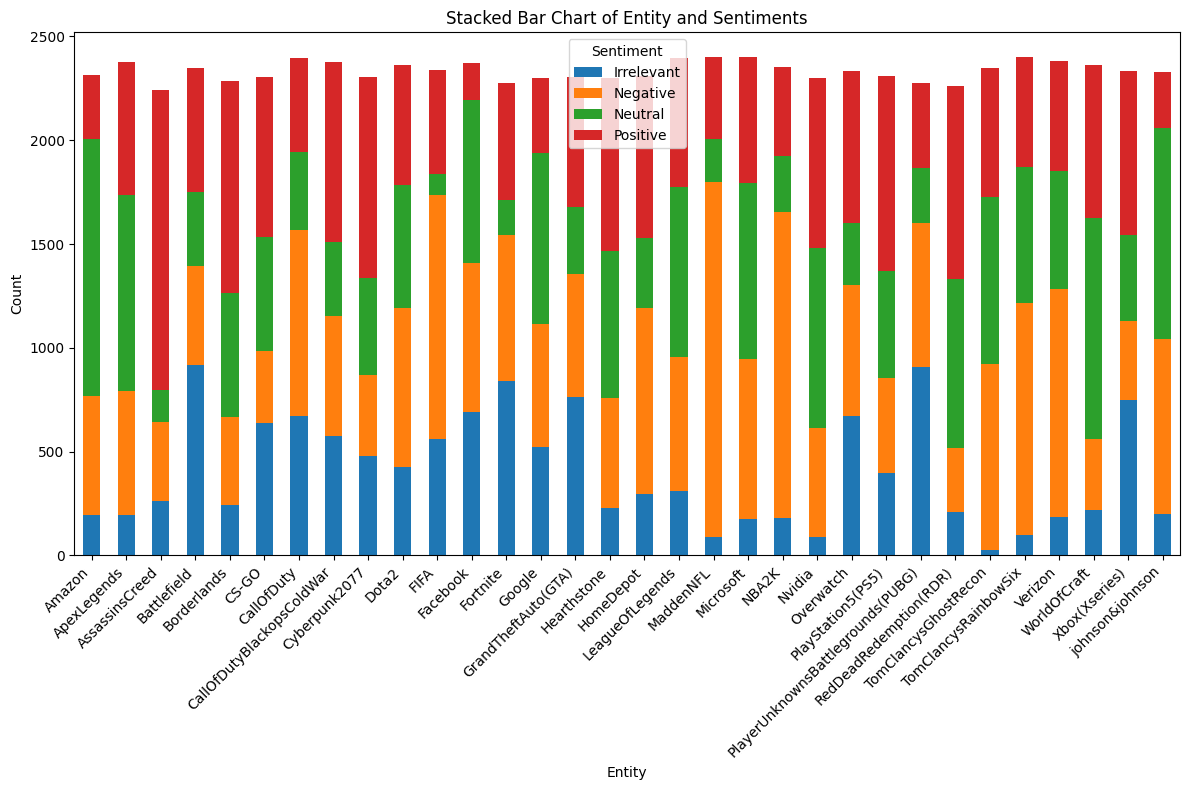

In [20]:
# EDA 3: Stacked Bar Chart of Sentiment Distribution by Entity
entity_sentiment_counts = pd.crosstab(training_data['Entity'], training_data['Sentiment'])

plt.figure(figsize=(12, 8))
entity_sentiment_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Stacked Bar Chart of Entity and Sentiments')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [21]:
# EDA 4: Tweet Length Distribution
training_data['Message_Length'] = training_data['Message'].apply(len)
validation_data['Message_Length'] = validation_data['Message'].apply(len)

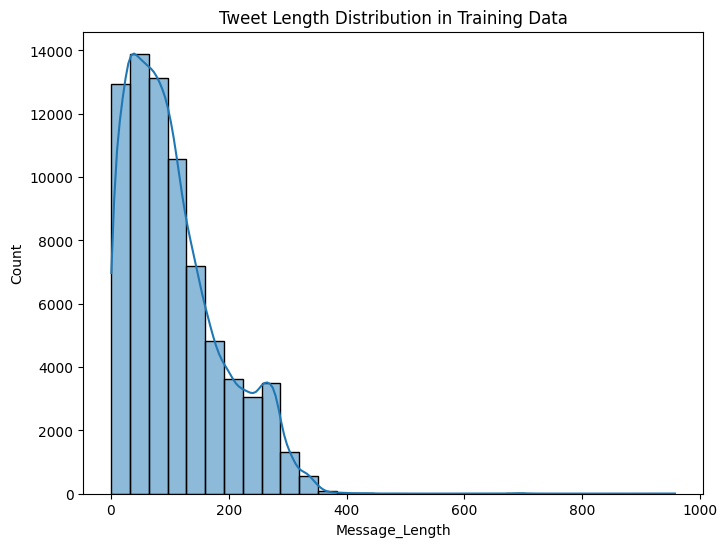

In [46]:
plt.figure(figsize=(8, 6))
sns.histplot(training_data['Message_Length'], kde=True, bins=30)
plt.title('Tweet Length Distribution in Training Data')
plt.show()

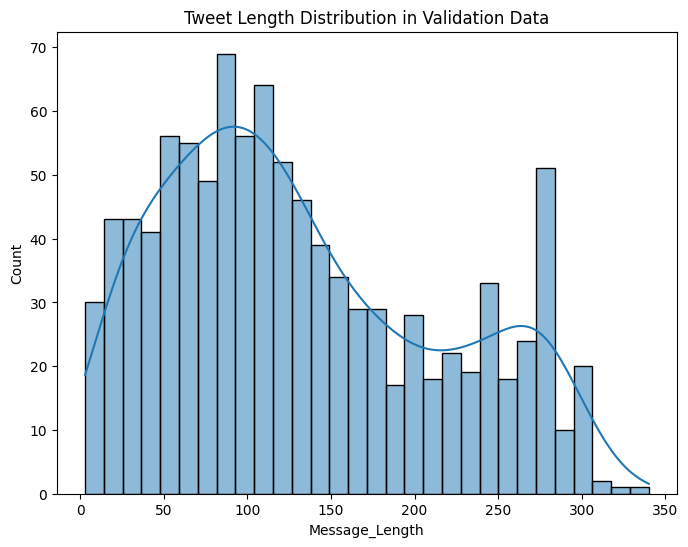

In [47]:
plt.figure(figsize=(8, 6))
sns.histplot(validation_data['Message_Length'], kde=True, bins=30)
plt.title('Tweet Length Distribution in Validation Data')
plt.show()

In [24]:
# EDA 5: Wordcloud
# Filter messages based on sentiment categories
positive_messages = ' '.join(training_data[training_data['Sentiment'] == 'Positive']['Message'])
negative_messages = ' '.join(training_data[training_data['Sentiment'] == 'Negative']['Message'])
neutral_messages = ' '.join(training_data[training_data['Sentiment'] == 'Neutral']['Message'])
irrelevant_messages = ' '.join(training_data[training_data['Sentiment'] == 'Irrelevant']['Message'])

In [25]:
# Create word clouds for each sentiment category
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_messages)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_messages)
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_messages)
wordcloud_irrelevant = WordCloud(width=800, height=400, background_color='white').generate(irrelevant_messages)

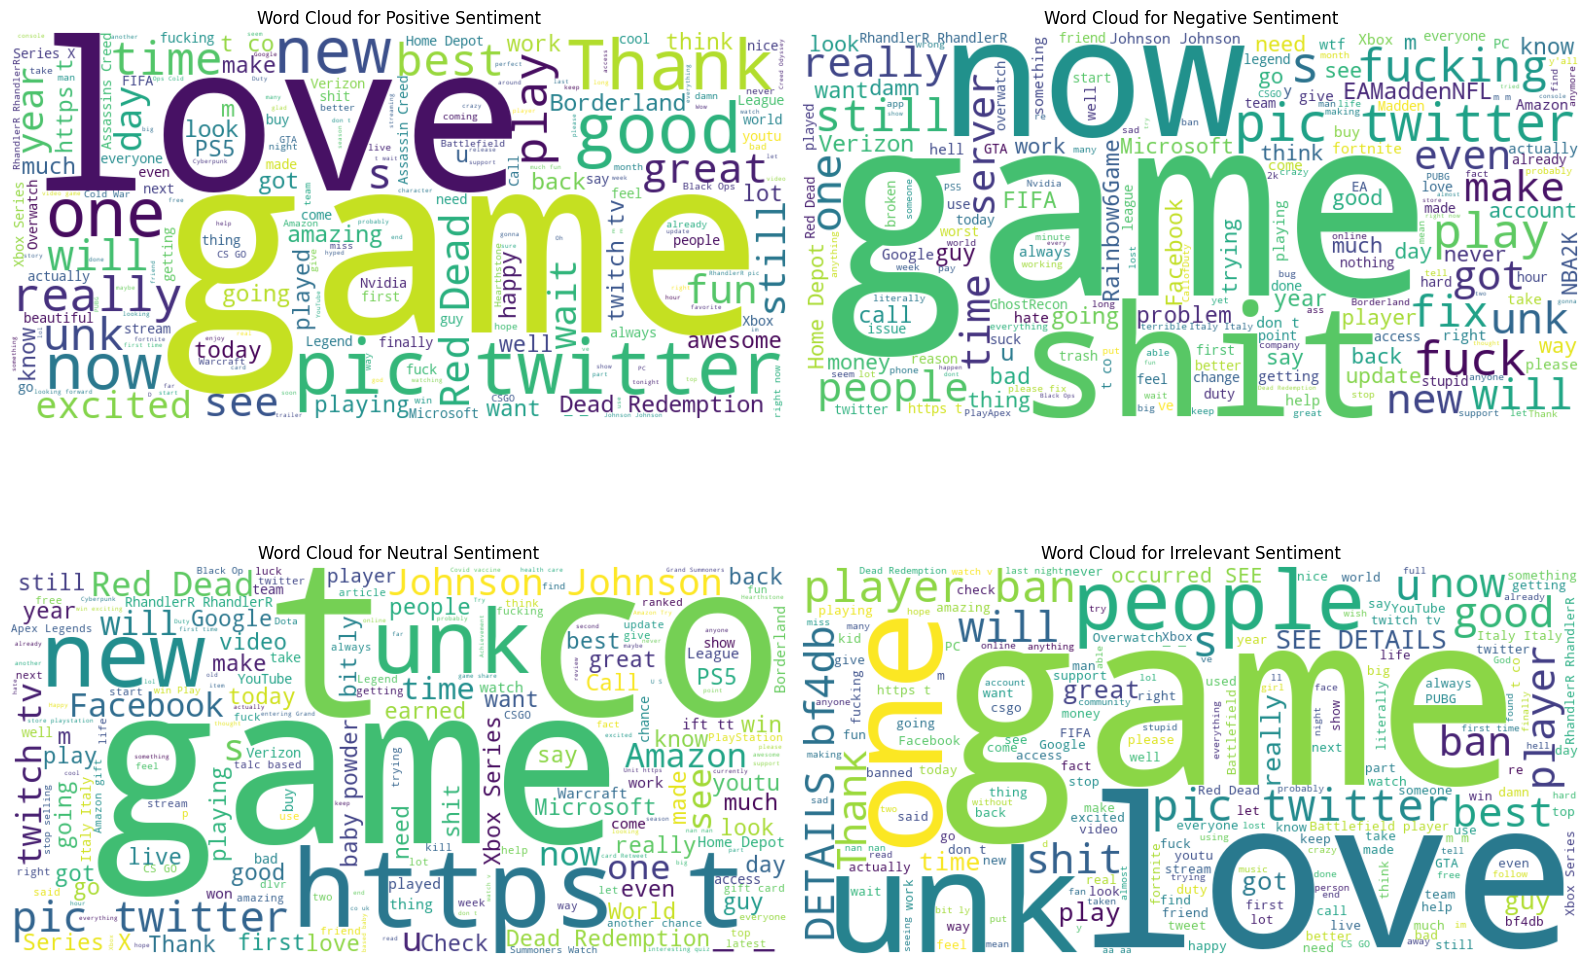

In [26]:
# Set up subplots to show all word clouds
plt.figure(figsize=(16, 12))

# Plot Positive WordCloud
plt.subplot(2, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiment')
plt.axis('off')

# Plot Negative WordCloud
plt.subplot(2, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Sentiment')
plt.axis('off')

# Plot Neutral WordCloud
plt.subplot(2, 2, 3)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Word Cloud for Neutral Sentiment')
plt.axis('off')

# Plot Irrelevant WordCloud
plt.subplot(2, 2, 4)
plt.imshow(wordcloud_irrelevant, interpolation='bilinear')
plt.title('Word Cloud for Irrelevant Sentiment')
plt.axis('off')

# Display the plots
plt.tight_layout()
plt.show()

#### TF-IDF Vectorization

In [27]:
# Preprocess the text using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

In [28]:
# Transform the training and validation messages
X_train_tfidf = tfidf_vectorizer.fit_transform(training_data['Message'])
X_validation_tfidf = tfidf_vectorizer.transform(validation_data['Message'])

In [29]:
# Target labels
y_train = training_data['Sentiment']
y_validation = validation_data['Sentiment']

In [30]:
print(X_validation_tfidf[1])

  (0, 1365)	0.25375818990801974
  (0, 1801)	0.16427204553917904
  (0, 2385)	0.1617142229608713
  (0, 2808)	0.28489810937641696
  (0, 2923)	0.18165939800335978
  (0, 3072)	0.17779432720487093
  (0, 3198)	0.3674527392105715
  (0, 3332)	0.502756369273024
  (0, 4064)	0.20254347809756923
  (0, 4841)	0.25203123257957544
  (0, 4857)	0.26168190625875715
  (0, 4907)	0.4193871583979477


#### Logistic Regression

In [31]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)
y_pred_lr = lr_model.predict(X_validation_tfidf)

In [32]:
accuracy_lr = accuracy_score(y_validation, y_pred_lr)
report_lr = classification_report(y_validation, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)
print("Logistic Regression Classification Report:\n", report_lr)

Logistic Regression Accuracy: 0.8178178178178178
Logistic Regression Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.82      0.74      0.78       171
    Negative       0.79      0.88      0.83       266
     Neutral       0.87      0.77      0.82       285
    Positive       0.80      0.86      0.83       277

    accuracy                           0.82       999
   macro avg       0.82      0.81      0.81       999
weighted avg       0.82      0.82      0.82       999



#### Random Forest

In [33]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth= 100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
y_pred_rf = rf_model.predict(X_validation_tfidf)

In [42]:
accuracy_rf = accuracy_score(y_validation, y_pred_rf)
report_rf = classification_report(y_validation, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:\n", report_rf)

Random Forest Accuracy: 0.950938938938939
Random Forest Classification Report:
               precision    recall  f1-score   support

  Irrelevant       1.00      0.88      0.94       171
    Negative       0.95      0.96      0.95       266
     Neutral       0.91      0.94      0.93       285
    Positive       0.92      0.95      0.94       277

    accuracy                           0.94       999
   macro avg       0.95      0.93      0.94       999
weighted avg       0.94      0.94      0.94       999



#### Decision Tree

In [35]:
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

In [36]:
# Train the model
dt_model.fit(X_train_tfidf, y_train)

DecisionTreeClassifier(random_state=42)

In [37]:
# Make predictions on the validation set
y_pred_dt = dt_model.predict(X_validation_tfidf)

In [38]:
# Evaluate the model
accuracy_dt = accuracy_score(y_validation, y_pred_dt)
report_dt = classification_report(y_validation, y_pred_dt)

In [39]:
# Classification Report
print("Decision Tree Model Accuracy:", accuracy_dt)
print("Decision Tree Model Classification Report:\n", report_dt)

Decision Tree Model Accuracy: 0.8868868868868869
Decision Tree Model Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.91      0.82      0.87       171
    Negative       0.90      0.95      0.92       266
     Neutral       0.87      0.86      0.86       285
    Positive       0.88      0.90      0.89       277

    accuracy                           0.89       999
   macro avg       0.89      0.88      0.88       999
weighted avg       0.89      0.89      0.89       999



**Conclusion:**
The model that delivers the best performance overall is RandomForestClassifier with 95% accuracy